<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/Diracturing/Lab_7/Diracturing_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and learning**
**Julius Andersson**

# **Abstract**
In this lab the problem of finding the minimum of a function is investigated. Here we implement a gradient descent method in $R^n$ and test its accuracy and convergence.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [ ]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**
Finding the minimum and the maximum of a function is an important task. For example we might want to maximize profit or minimize our loss. The maximizing problem of f(x) can be formulated as instead minimizing -f(x). Therefore in this lab we will focus on the minimizing problem.   

# **Method**
The gradient descent method is an iterative search method. It search in the direction opposite to the gradient of the function we wish to find the minimum. The algorithm is taken from the lecture notes from algorithm 15.1. The forward difference is used for taking derivatives. The alpha parameter is set to a fixed value. 

In [ ]:
def grad(f,x):
  h=1e-8
  Df=np.zeros(len(x))
  for i in range(len(x)):
    hvec=np.zeros(len(x))
    hvec[i]=h
    Df[i]=(f(x+hvec)-f(x))/h
  return Df

def getAlpha(alpha):
  return alpha

def gradientDesc(f,x0,alpha):
  NrOfIterations=0
  Res=[]
  TOL=1E-8
  x=x0
  Df=grad(f,x)  
  while np.linalg.norm(Df)>TOL and NrOfIterations<1000 :
    Df=grad(f,x)
    alpha=getAlpha(alpha)
    x=x-alpha*Df
    Res.append(f(x))
    NrOfIterations+=1
  return x,Res


# **Results**

Here we will test 3 functions. First $f(x)=x^2+y^2$, where min(f(x))=0. Secondly $f(x)=x^2$, where min(f(x))=0. Lastly sin(x+y) where min(f(x))=-1. The graphs show the value of f(x) for each iteration of the gradient descent method. All test use alpha=0.01 except the 3rd test who uses alpha=1.

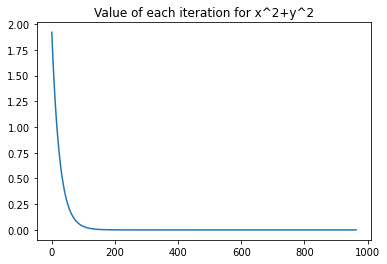

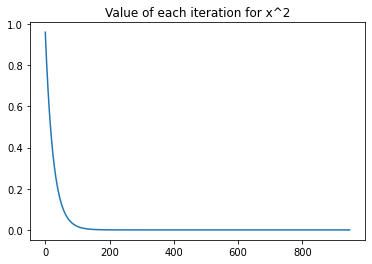

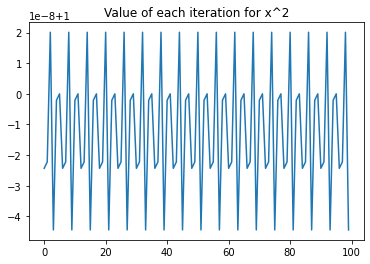

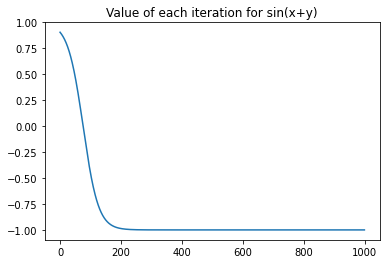

In [50]:
f=lambda x: x[0]*x[0]+x[1]*x[1]
ans,prevAnswers=gradientDesc(f,[1,1],0.01)
assert abs(f(ans))<0+1E-8


x=[i for i in range(len(prevAnswers))]
plt.plot(x,prevAnswers)
plt.title("Value of each iteration for x^2+y^2")
plt.show()

f=lambda x: x[0]**2
ans,prevAnswers=gradientDesc(f,[1],0.01)
assert abs(f(ans))<0+1E-8

x=[i for i in range(len(prevAnswers))]
plt.plot(x,prevAnswers)
plt.title("Value of each iteration for x^2")
plt.show()

f=lambda x: x[0]**2
ans,prevAnswers=gradientDesc(f,[1],1)
#assert abs(f(ans))<0+1E-8

prevAnswers=prevAnswers[:100]
x=[i for i in range(len(prevAnswers))]
plt.plot(x,prevAnswers)
plt.title("Value of each iteration for x^2")
plt.show()

f=lambda x: np.sin(x[0]+x[1])
ans,prevAnswers=gradientDesc(f,[1,1],0.01)
assert abs(f(ans)+1)<1E-8

x=[i for i in range(len(prevAnswers))]
plt.plot(x,prevAnswers)
plt.title("Value of each iteration for sin(x+y)")
plt.show()

# **Discussion**
From the results we can see that the value converges to the correct solution in 3 of the cases. It converges fast until it is close to the solution where it then goes much slower. In the case of $f(x)=x^2$ and where alpha=1 we see that it doesn't converge but oscillate in the same pattern. This is an interesting aspect and further work should be investigated in what values for alpha converging occur and what the best alpha value should be for the fastest converging. 

# **APPENDIX**